In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: DISCA
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


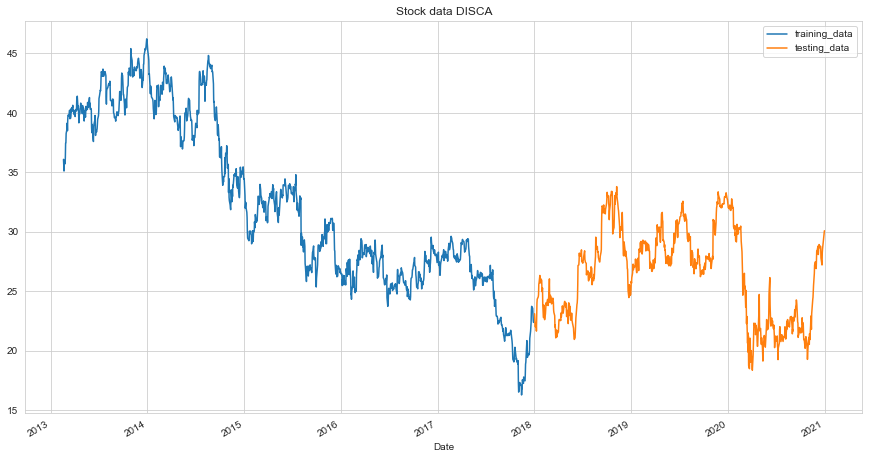

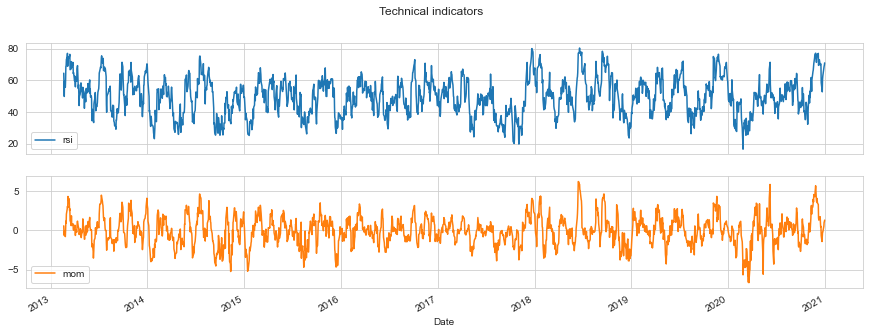

In [2]:
stock_name = 'disca'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 944.09, duration: 0:00:00.398092
episode: 2/2000, episode end value: 884.34, duration: 0:00:00.377083
episode: 3/2000, episode end value: 896.21, duration: 0:00:00.347082
episode: 4/2000, episode end value: 878.22, duration: 0:00:00.373077
episode: 5/2000, episode end value: 905.80, duration: 0:00:00.313071
episode: 6/2000, episode end value: 893.56, duration: 0:00:00.368083
episode: 7/2000, episode end value: 897.49, duration: 0:00:00.384089
episode: 8/2000, episode end value: 916.81, duration: 0:00:00.372083
episode: 9/2000, episode end value: 932.57, duration: 0:00:00.386093
episode: 10/2000, episode end value: 890.19, duration: 0:00:00.334076
episode: 11/2000, episode end value: 898.57, duration: 0:00:00.369081
episode: 12/2000, episode end value: 882.86, duration: 0:00:00.385085
episode: 13/2000, episode end value: 897.56, duration: 0:00:00.326077
episode: 14/2000, episode end value: 872.32, duration: 0:00:00.373085
episode: 15/2000, episode end

episode: 118/2000, episode end value: 895.28, duration: 0:00:00.383084
episode: 119/2000, episode end value: 891.52, duration: 0:00:00.375478
episode: 120/2000, episode end value: 890.90, duration: 0:00:00.353988
episode: 121/2000, episode end value: 914.06, duration: 0:00:00.385089
episode: 122/2000, episode end value: 921.88, duration: 0:00:00.397091
episode: 123/2000, episode end value: 990.37, duration: 0:00:00.357074
episode: 124/2000, episode end value: 926.41, duration: 0:00:00.457102
episode: 125/2000, episode end value: 926.92, duration: 0:00:00.421095
episode: 126/2000, episode end value: 917.14, duration: 0:00:00.410091
episode: 127/2000, episode end value: 915.40, duration: 0:00:00.442101
episode: 128/2000, episode end value: 922.34, duration: 0:00:00.574130
episode: 129/2000, episode end value: 904.76, duration: 0:00:00.410086
episode: 130/2000, episode end value: 897.63, duration: 0:00:00.365083
episode: 131/2000, episode end value: 952.01, duration: 0:00:00.367083
episod

episode: 234/2000, episode end value: 947.49, duration: 0:00:00.379084
episode: 235/2000, episode end value: 930.91, duration: 0:00:00.438098
episode: 236/2000, episode end value: 941.67, duration: 0:00:00.401089
episode: 237/2000, episode end value: 957.60, duration: 0:00:00.517117
episode: 238/2000, episode end value: 947.58, duration: 0:00:00.333074
episode: 239/2000, episode end value: 963.51, duration: 0:00:00.507113
episode: 240/2000, episode end value: 948.06, duration: 0:00:00.456102
episode: 241/2000, episode end value: 936.21, duration: 0:00:00.411091
episode: 242/2000, episode end value: 948.19, duration: 0:00:00.494108
episode: 243/2000, episode end value: 949.40, duration: 0:00:00.441105
episode: 244/2000, episode end value: 943.00, duration: 0:00:00.401088
episode: 245/2000, episode end value: 931.47, duration: 0:00:00.435102
episode: 246/2000, episode end value: 933.68, duration: 0:00:00.497117
episode: 247/2000, episode end value: 945.38, duration: 0:00:00.457102
episod

episode: 350/2000, episode end value: 901.48, duration: 0:00:00.430098
episode: 351/2000, episode end value: 920.99, duration: 0:00:00.412094
episode: 352/2000, episode end value: 926.57, duration: 0:00:00.420099
episode: 353/2000, episode end value: 927.78, duration: 0:00:00.376083
episode: 354/2000, episode end value: 944.38, duration: 0:00:00.444099
episode: 355/2000, episode end value: 899.68, duration: 0:00:00.466105
episode: 356/2000, episode end value: 908.60, duration: 0:00:00.498114
episode: 357/2000, episode end value: 924.46, duration: 0:00:00.459104
episode: 358/2000, episode end value: 945.78, duration: 0:00:00.418093
episode: 359/2000, episode end value: 940.15, duration: 0:00:00.315072
episode: 360/2000, episode end value: 915.60, duration: 0:00:00.347076
episode: 361/2000, episode end value: 922.95, duration: 0:00:00.469971
episode: 362/2000, episode end value: 961.26, duration: 0:00:00.406093
episode: 363/2000, episode end value: 959.97, duration: 0:00:00.458101
episod

episode: 466/2000, episode end value: 907.84, duration: 0:00:00.346078
episode: 467/2000, episode end value: 919.25, duration: 0:00:00.369086
episode: 468/2000, episode end value: 918.71, duration: 0:00:00.357081
episode: 469/2000, episode end value: 965.46, duration: 0:00:00.421097
episode: 470/2000, episode end value: 933.65, duration: 0:00:00.441103
episode: 471/2000, episode end value: 911.54, duration: 0:00:00.395088
episode: 472/2000, episode end value: 922.35, duration: 0:00:00.407090
episode: 473/2000, episode end value: 919.09, duration: 0:00:00.468104
episode: 474/2000, episode end value: 1003.41, duration: 0:00:00.319068
episode: 475/2000, episode end value: 949.79, duration: 0:00:00.372083
episode: 476/2000, episode end value: 946.33, duration: 0:00:00.439098
episode: 477/2000, episode end value: 960.15, duration: 0:00:00.463101
episode: 478/2000, episode end value: 985.59, duration: 0:00:00.397089
episode: 479/2000, episode end value: 917.26, duration: 0:00:00.408799
episo

episode: 582/2000, episode end value: 911.95, duration: 0:00:00.315069
episode: 583/2000, episode end value: 990.51, duration: 0:00:00.310068
episode: 584/2000, episode end value: 914.89, duration: 0:00:00.433100
episode: 585/2000, episode end value: 958.98, duration: 0:00:00.403089
episode: 586/2000, episode end value: 961.30, duration: 0:00:00.447099
episode: 587/2000, episode end value: 959.96, duration: 0:00:00.441099
episode: 588/2000, episode end value: 961.15, duration: 0:00:00.423096
episode: 589/2000, episode end value: 966.10, duration: 0:00:00.383086
episode: 590/2000, episode end value: 960.68, duration: 0:00:00.432096
episode: 591/2000, episode end value: 954.27, duration: 0:00:00.460104
episode: 592/2000, episode end value: 964.63, duration: 0:00:00.442099
episode: 593/2000, episode end value: 1021.19, duration: 0:00:00.434095
episode: 594/2000, episode end value: 923.18, duration: 0:00:00.417092
episode: 595/2000, episode end value: 949.53, duration: 0:00:00.404089
episo

episode: 698/2000, episode end value: 918.78, duration: 0:00:00.402092
episode: 699/2000, episode end value: 943.01, duration: 0:00:00.316069
episode: 700/2000, episode end value: 951.42, duration: 0:00:00.371086
episode: 701/2000, episode end value: 949.45, duration: 0:00:00.309067
episode: 702/2000, episode end value: 930.42, duration: 0:00:00.391091
episode: 703/2000, episode end value: 957.72, duration: 0:00:00.338075
episode: 704/2000, episode end value: 948.19, duration: 0:00:00.338075
episode: 705/2000, episode end value: 965.44, duration: 0:00:00.303066
episode: 706/2000, episode end value: 979.75, duration: 0:00:00.324076
episode: 707/2000, episode end value: 969.16, duration: 0:00:00.403093
episode: 708/2000, episode end value: 982.17, duration: 0:00:00.306068
episode: 709/2000, episode end value: 947.99, duration: 0:00:00.389086
episode: 710/2000, episode end value: 957.52, duration: 0:00:00.362080
episode: 711/2000, episode end value: 952.19, duration: 0:00:00.361082
episod

episode: 814/2000, episode end value: 945.81, duration: 0:00:00.464207
episode: 815/2000, episode end value: 956.26, duration: 0:00:00.335546
episode: 816/2000, episode end value: 969.80, duration: 0:00:00.408091
episode: 817/2000, episode end value: 957.02, duration: 0:00:00.483109
episode: 818/2000, episode end value: 957.00, duration: 0:00:00.420094
episode: 819/2000, episode end value: 948.60, duration: 0:00:00.482106
episode: 820/2000, episode end value: 951.45, duration: 0:00:00.470105
episode: 821/2000, episode end value: 950.07, duration: 0:00:00.472106
episode: 822/2000, episode end value: 947.93, duration: 0:00:00.488106
episode: 823/2000, episode end value: 948.63, duration: 0:00:00.444098
episode: 824/2000, episode end value: 938.04, duration: 0:00:00.339083
episode: 825/2000, episode end value: 948.11, duration: 0:00:00.379083
episode: 826/2000, episode end value: 965.36, duration: 0:00:00.399092
episode: 827/2000, episode end value: 972.23, duration: 0:00:00.360083
episod

episode: 930/2000, episode end value: 952.01, duration: 0:00:00.352078
episode: 931/2000, episode end value: 947.03, duration: 0:00:00.340076
episode: 932/2000, episode end value: 950.85, duration: 0:00:00.351079
episode: 933/2000, episode end value: 948.17, duration: 0:00:00.401095
episode: 934/2000, episode end value: 953.14, duration: 0:00:00.427096
episode: 935/2000, episode end value: 957.39, duration: 0:00:00.375090
episode: 936/2000, episode end value: 951.99, duration: 0:00:00.392086
episode: 937/2000, episode end value: 956.84, duration: 0:00:00.340078
episode: 938/2000, episode end value: 970.71, duration: 0:00:00.314072
episode: 939/2000, episode end value: 960.98, duration: 0:00:00.360085
episode: 940/2000, episode end value: 957.45, duration: 0:00:00.331072
episode: 941/2000, episode end value: 946.96, duration: 0:00:00.334693
episode: 942/2000, episode end value: 952.08, duration: 0:00:00.332962
episode: 943/2000, episode end value: 951.65, duration: 0:00:00.312069
episod

episode: 1045/2000, episode end value: 917.21, duration: 0:00:00.270061
episode: 1046/2000, episode end value: 955.74, duration: 0:00:00.292062
episode: 1047/2000, episode end value: 940.20, duration: 0:00:00.289062
episode: 1048/2000, episode end value: 948.24, duration: 0:00:00.350519
episode: 1049/2000, episode end value: 938.48, duration: 0:00:00.316515
episode: 1050/2000, episode end value: 935.46, duration: 0:00:00.362082
episode: 1051/2000, episode end value: 954.14, duration: 0:00:00.343081
episode: 1052/2000, episode end value: 953.90, duration: 0:00:00.345077
episode: 1053/2000, episode end value: 950.85, duration: 0:00:00.319071
episode: 1054/2000, episode end value: 954.02, duration: 0:00:00.364080
episode: 1055/2000, episode end value: 970.53, duration: 0:00:00.259081
episode: 1056/2000, episode end value: 973.84, duration: 0:00:00.293556
episode: 1057/2000, episode end value: 958.76, duration: 0:00:00.336144
episode: 1058/2000, episode end value: 952.40, duration: 0:00:00

episode: 1159/2000, episode end value: 952.09, duration: 0:00:00.281062
episode: 1160/2000, episode end value: 971.47, duration: 0:00:00.292065
episode: 1161/2000, episode end value: 961.48, duration: 0:00:00.275062
episode: 1162/2000, episode end value: 959.22, duration: 0:00:00.309069
episode: 1163/2000, episode end value: 957.79, duration: 0:00:00.318075
episode: 1164/2000, episode end value: 952.54, duration: 0:00:00.319070
episode: 1165/2000, episode end value: 952.15, duration: 0:00:00.306614
episode: 1166/2000, episode end value: 949.71, duration: 0:00:00.360051
episode: 1167/2000, episode end value: 944.14, duration: 0:00:00.298069
episode: 1168/2000, episode end value: 938.68, duration: 0:00:00.291069
episode: 1169/2000, episode end value: 961.31, duration: 0:00:00.288063
episode: 1170/2000, episode end value: 962.62, duration: 0:00:00.351080
episode: 1171/2000, episode end value: 961.79, duration: 0:00:00.293066
episode: 1172/2000, episode end value: 991.68, duration: 0:00:00

episode: 1273/2000, episode end value: 956.67, duration: 0:00:00.289131
episode: 1274/2000, episode end value: 950.36, duration: 0:00:00.329989
episode: 1275/2000, episode end value: 949.13, duration: 0:00:00.302067
episode: 1276/2000, episode end value: 947.75, duration: 0:00:00.311069
episode: 1277/2000, episode end value: 951.94, duration: 0:00:00.313071
episode: 1278/2000, episode end value: 949.50, duration: 0:00:00.339072
episode: 1279/2000, episode end value: 950.47, duration: 0:00:00.315505
episode: 1280/2000, episode end value: 948.24, duration: 0:00:00.321647
episode: 1281/2000, episode end value: 945.66, duration: 0:00:00.305248
episode: 1282/2000, episode end value: 948.63, duration: 0:00:00.299683
episode: 1283/2000, episode end value: 948.31, duration: 0:00:00.331075
episode: 1284/2000, episode end value: 958.92, duration: 0:00:00.300066
episode: 1285/2000, episode end value: 955.69, duration: 0:00:00.346081
episode: 1286/2000, episode end value: 962.30, duration: 0:00:00

episode: 1387/2000, episode end value: 952.77, duration: 0:00:00.369084
episode: 1388/2000, episode end value: 943.71, duration: 0:00:00.392088
episode: 1389/2000, episode end value: 959.95, duration: 0:00:00.360084
episode: 1390/2000, episode end value: 957.79, duration: 0:00:00.353210
episode: 1391/2000, episode end value: 964.31, duration: 0:00:00.324070
episode: 1392/2000, episode end value: 966.06, duration: 0:00:00.327073
episode: 1393/2000, episode end value: 954.05, duration: 0:00:00.357079
episode: 1394/2000, episode end value: 993.24, duration: 0:00:00.330118
episode: 1395/2000, episode end value: 981.29, duration: 0:00:00.303776
episode: 1396/2000, episode end value: 945.36, duration: 0:00:00.367084
episode: 1397/2000, episode end value: 950.10, duration: 0:00:00.441922
episode: 1398/2000, episode end value: 951.09, duration: 0:00:00.425844
episode: 1399/2000, episode end value: 951.14, duration: 0:00:00.378083
episode: 1400/2000, episode end value: 949.50, duration: 0:00:00

episode: 1501/2000, episode end value: 960.50, duration: 0:00:00.316072
episode: 1502/2000, episode end value: 947.57, duration: 0:00:00.304067
episode: 1503/2000, episode end value: 952.51, duration: 0:00:00.309066
episode: 1504/2000, episode end value: 947.26, duration: 0:00:00.307070
episode: 1505/2000, episode end value: 952.45, duration: 0:00:00.297066
episode: 1506/2000, episode end value: 942.52, duration: 0:00:00.316074
episode: 1507/2000, episode end value: 947.40, duration: 0:00:00.316067
episode: 1508/2000, episode end value: 957.79, duration: 0:00:00.321070
episode: 1509/2000, episode end value: 957.77, duration: 0:00:00.305069
episode: 1510/2000, episode end value: 942.61, duration: 0:00:00.270060
episode: 1511/2000, episode end value: 961.13, duration: 0:00:00.335074
episode: 1512/2000, episode end value: 969.53, duration: 0:00:00.336077
episode: 1513/2000, episode end value: 966.48, duration: 0:00:00.315072
episode: 1514/2000, episode end value: 965.17, duration: 0:00:00

episode: 1615/2000, episode end value: 954.05, duration: 0:00:00.348080
episode: 1616/2000, episode end value: 950.79, duration: 0:00:00.347081
episode: 1617/2000, episode end value: 944.99, duration: 0:00:00.314069
episode: 1618/2000, episode end value: 941.61, duration: 0:00:00.347187
episode: 1619/2000, episode end value: 945.59, duration: 0:00:00.338076
episode: 1620/2000, episode end value: 950.65, duration: 0:00:00.300063
episode: 1621/2000, episode end value: 950.16, duration: 0:00:00.325072
episode: 1622/2000, episode end value: 967.58, duration: 0:00:00.272059
episode: 1623/2000, episode end value: 954.98, duration: 0:00:00.271061
episode: 1624/2000, episode end value: 953.51, duration: 0:00:00.306065
episode: 1625/2000, episode end value: 950.12, duration: 0:00:00.309073
episode: 1626/2000, episode end value: 945.30, duration: 0:00:00.310068
episode: 1627/2000, episode end value: 949.71, duration: 0:00:00.314073
episode: 1628/2000, episode end value: 955.18, duration: 0:00:00

episode: 1729/2000, episode end value: 950.00, duration: 0:00:00.274061
episode: 1730/2000, episode end value: 946.47, duration: 0:00:00.289084
episode: 1731/2000, episode end value: 952.04, duration: 0:00:00.289048
episode: 1732/2000, episode end value: 961.98, duration: 0:00:00.264078
episode: 1733/2000, episode end value: 961.39, duration: 0:00:00.265044
episode: 1734/2000, episode end value: 961.70, duration: 0:00:00.278603
episode: 1735/2000, episode end value: 960.71, duration: 0:00:00.278055
episode: 1736/2000, episode end value: 952.67, duration: 0:00:00.283911
episode: 1737/2000, episode end value: 959.75, duration: 0:00:00.261060
episode: 1738/2000, episode end value: 960.60, duration: 0:00:00.277060
episode: 1739/2000, episode end value: 953.42, duration: 0:00:00.257057
episode: 1740/2000, episode end value: 945.85, duration: 0:00:00.259058
episode: 1741/2000, episode end value: 970.16, duration: 0:00:00.299072
episode: 1742/2000, episode end value: 973.49, duration: 0:00:00

episode: 1843/2000, episode end value: 956.47, duration: 0:00:00.226886
episode: 1844/2000, episode end value: 954.56, duration: 0:00:00.214468
episode: 1845/2000, episode end value: 956.58, duration: 0:00:00.244628
episode: 1846/2000, episode end value: 960.96, duration: 0:00:00.235062
episode: 1847/2000, episode end value: 951.87, duration: 0:00:00.236059
episode: 1848/2000, episode end value: 953.99, duration: 0:00:00.233053
episode: 1849/2000, episode end value: 949.25, duration: 0:00:00.230049
episode: 1850/2000, episode end value: 961.19, duration: 0:00:00.199042
episode: 1851/2000, episode end value: 949.38, duration: 0:00:00.233053
episode: 1852/2000, episode end value: 951.75, duration: 0:00:00.216034
episode: 1853/2000, episode end value: 948.32, duration: 0:00:00.217063
episode: 1854/2000, episode end value: 953.63, duration: 0:00:00.218049
episode: 1855/2000, episode end value: 952.12, duration: 0:00:00.228038
episode: 1856/2000, episode end value: 946.98, duration: 0:00:00

episode: 1957/2000, episode end value: 948.66, duration: 0:00:00.214841
episode: 1958/2000, episode end value: 953.24, duration: 0:00:00.199336
episode: 1959/2000, episode end value: 950.99, duration: 0:00:00.216049
episode: 1960/2000, episode end value: 952.72, duration: 0:00:00.216048
episode: 1961/2000, episode end value: 963.42, duration: 0:00:00.204046
episode: 1962/2000, episode end value: 951.30, duration: 0:00:00.220036
episode: 1963/2000, episode end value: 960.59, duration: 0:00:00.208053
episode: 1964/2000, episode end value: 963.29, duration: 0:00:00.208045
episode: 1965/2000, episode end value: 960.11, duration: 0:00:00.177046
episode: 1966/2000, episode end value: 962.42, duration: 0:00:00.213048
episode: 1967/2000, episode end value: 950.18, duration: 0:00:00.199046
episode: 1968/2000, episode end value: 953.82, duration: 0:00:00.217042
episode: 1969/2000, episode end value: 951.05, duration: 0:00:00.211047
episode: 1970/2000, episode end value: 956.95, duration: 0:00:00

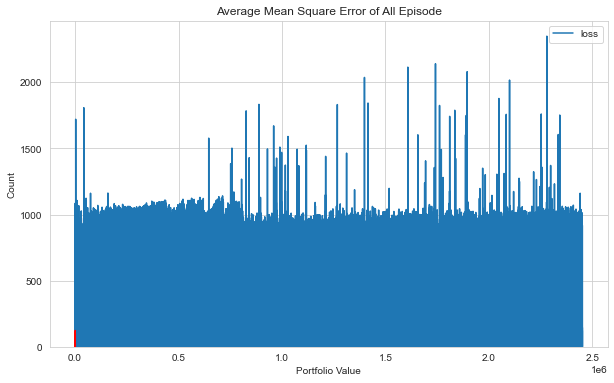

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

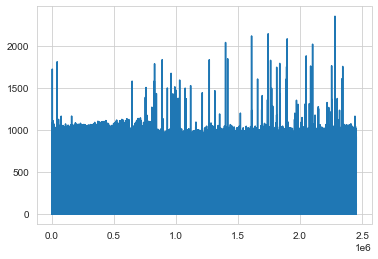

In [6]:
plt.plot(agent.model.losses)

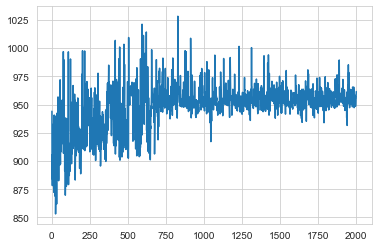

In [7]:
plt.plot(portfolio_value)

episode end value: 1146.16, duration: 0:00:00.050066
Sell: 0 times, Buy: 1 times


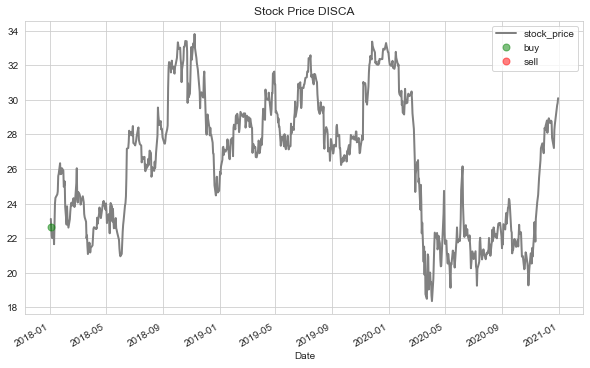

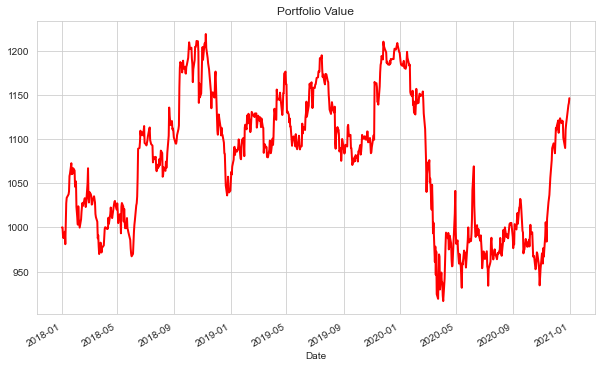

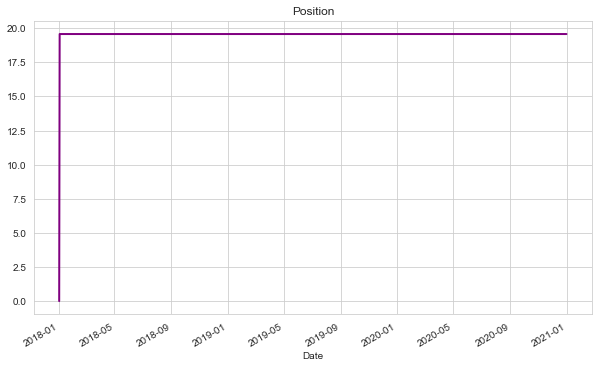

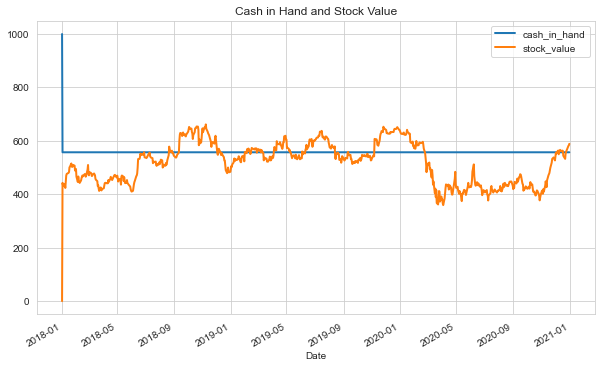

In [8]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [9]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DISCA
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.65 %
Volatility: 0.1872
shape ratio: 0.1898
Maximun drawdown: -24.79 %
Calmar ratio: 0.1876
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 9.20 %
Volatility (benchmark): 0.4038
shape ratio: 0.2005
Maximun drawdown: -45.68 %
Calmar ratio (benchmark): 0.2013


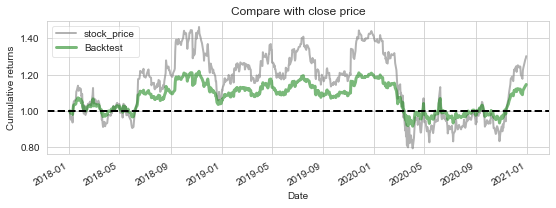

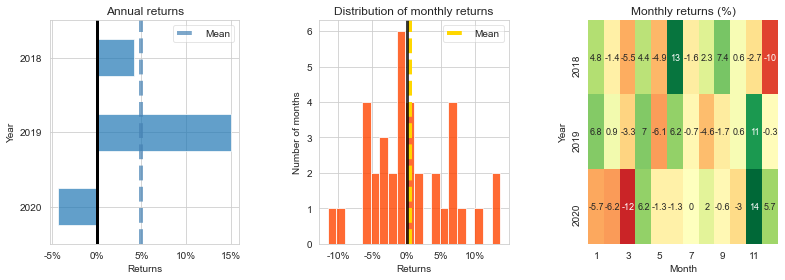

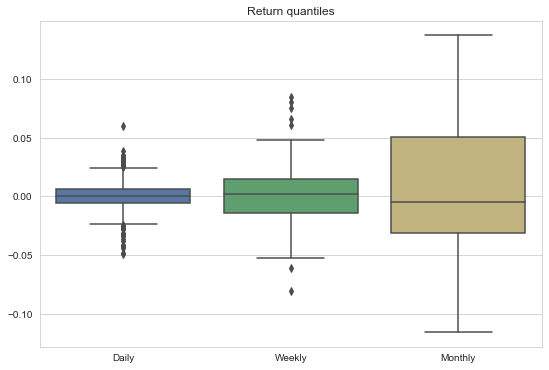

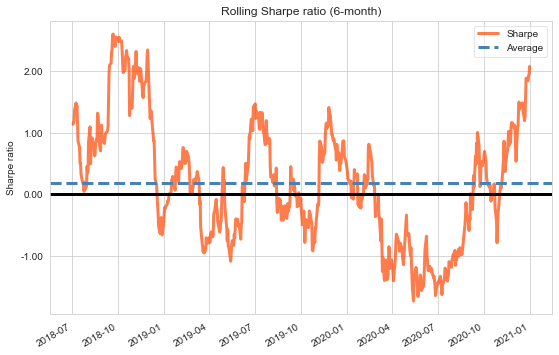

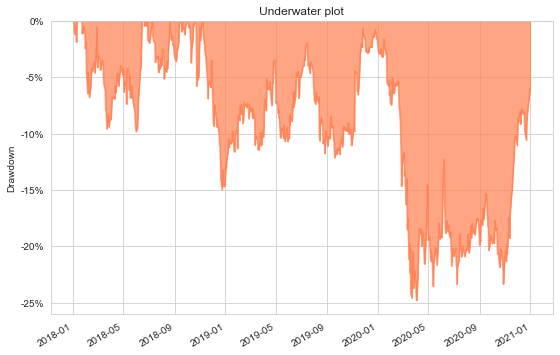

In [10]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')